In [1]:
cd /content/drive/My Drive/Mask Detection

/content/drive/My Drive/Mask Detection


In [2]:
import  numpy as np 
data = np.load('data.npy')
target = np.load('target.npy')

In [3]:
data.shape[1:]

(100, 100, 1)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [5]:


model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=30,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/30
990/990 [==============================] - 6s 6ms/step - loss: 0.8233 - accuracy: 0.5444 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/30
990/990 [==============================] - 3s 3ms/step - loss: 0.6616 - accuracy: 0.6354 - val_loss: 0.7566 - val_accuracy: 0.4677
Epoch 3/30
990/990 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7182 - val_loss: 0.4497 - val_accuracy: 0.8911
Epoch 4/30
990/990 [==============================] - 3s 3ms/step - loss: 0.4888 - accuracy: 0.7707 - val_loss: 0.4854 - val_accuracy: 0.7500
Epoch 5/30
990/990 [==============================] - 3s 3ms/step - loss: 0.3655 - accuracy: 0.8576 - val_loss: 0.3361 - val_accuracy: 0.8589
Epoch 6/30
990/990 [==============================] - 3s 3ms/step - loss: 0.3109 - accuracy: 0.8737 - val_loss: 0.2473 - val_accuracy: 0.9194
Epoch 7/30
990/990 [==============================] - 3s 3ms/step - loss: 0.2860 - accuracy: 0.8747 - 

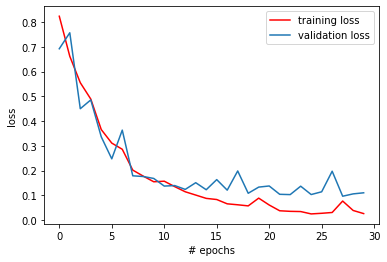

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

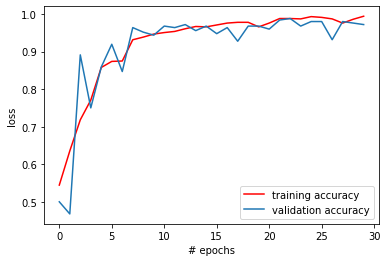

In [9]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 0s 2ms/step
[0.1479786793174951, 0.95652174949646]


In [18]:
y_pred = model.predict(test_data)
y_pred

array([[9.99995470e-01, 4.48106493e-06],
       [9.98536229e-01, 1.46377541e-03],
       [3.33071977e-04, 9.99666929e-01],
       [2.19248050e-05, 9.99978065e-01],
       [9.20492351e-01, 7.95076489e-02],
       [9.41337407e-01, 5.86625971e-02],
       [4.01774683e-04, 9.99598205e-01],
       [8.77875209e-06, 9.99991179e-01],
       [6.33570226e-03, 9.93664265e-01],
       [3.46464366e-02, 9.65353608e-01],
       [2.90894328e-04, 9.99709070e-01],
       [9.99995232e-01, 4.75638535e-06],
       [4.53194880e-05, 9.99954700e-01],
       [9.99948144e-01, 5.17949047e-05],
       [7.70359009e-07, 9.99999285e-01],
       [9.99526978e-01, 4.72983316e-04],
       [9.98312354e-01, 1.68765581e-03],
       [9.99144316e-01, 8.55620485e-04],
       [2.28374454e-04, 9.99771655e-01],
       [9.99997139e-01, 2.87392641e-06],
       [9.98709679e-01, 1.29037874e-03],
       [9.92951691e-01, 7.04828370e-03],
       [1.00622758e-01, 8.99377167e-01],
       [9.98819530e-01, 1.18042016e-03],
       [9.083641